In [1]:
#Import drive
from google.colab import drive
#Mount Google Drive
ROOT="/content/drive"
drive.mount(ROOT, force_remount=True)

MessageError: Error: credential propagation was unsuccessful


# Module III - Class 5 - Pytorch and Images

This notebook have the network framework pytorch and how CNNs work

# Neural Network Python versus Pytorch

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
#load the pickle file in OLAT
#df_dummies_model.to_pickle('df_dummies_model.pkl')

df_dummies_model=pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Deep Learning/dlss24/df_dummies_model.pkl')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_dummies_model.drop(columns=['District', 'y']), df_dummies_model[['y']], test_size=0.2, random_state=42)

In [ ]:
import numpy as np

def sigmoid(z):
    """
    Compute the sigmoid function for an input array or scalar.

    Arguments:
    z -- A scalar or numpy array of any size.

    Returns:
    s -- Sigmoid of z, same shape as z.
    """

    z_clipped = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z_clipped))

    # Example usage:
X_train, X_test, y_train, y_test = train_test_split(df_dummies_model.drop(columns=['District', 'y']), df_dummies_model[['y']], test_size=0.2, random_state=42)
X_train = np.array(X_train.values.T, dtype=float)
X_test =np.array(X_test.values.T, dtype=float)
Y_train = np.array(y_train.values.T, dtype=float)
Y_test = np.array(y_test.values.T, dtype=float)
num_iterations=2000
learning_rate=0.5
print_cost=False

In [ ]:
X_train.shape

In [ ]:
y_predicted.shape

In [ ]:
dz.shape

In [ ]:

m_train = X_train.shape[1]

num_features = X_train.shape[0]

# Initialize parameters
w = np.zeros([num_features, 1])
b = 0

# Gradient descent
costs = []
for i in range(num_iterations):
    # Forward propagation
    z_train = np.dot(w.T, X_train) + b
    z_train=np.array(z_train, dtype=float)
    y_predicted = sigmoid(z_train)

    epsilon = 1e-15  # Small constant to avoid division by zero
    # Compute cost
    cost = -1/m_train * np.sum(Y_train * np.log(y_predicted+ epsilon) + (1 - Y_train) * np.log(1 - y_predicted+ epsilon))
    costs.append(cost)




    # Backward propagation
    dz = y_predicted - Y_train
    dw = 1/m_train * np.dot(X_train, dz.T)
    db = 1/m_train * np.sum(dz)
    dw=np.array(dw, dtype=float)
    # Update parameters
    w -= learning_rate * dw
    b -= learning_rate * db

    # Print the cost every 100 training iterations
    if print_cost and i % 100 == 0:
        print ("Cost after iteration %i: %f" % (i, cost))


dw=np.array(w, dtype=float)
# Predict train/test set examples
Y_prediction_train = (sigmoid(np.array(np.dot(w.T, X_train),dtype=float)  + b) > 0.5).astype(int)
Y_prediction_test = (sigmoid(np.array(np.dot(w.T, X_test),dtype=float) + b) > 0.5).astype(int)

# Print train/test Errors
train_accuracy = np.mean(Y_prediction_train == Y_train) * 100
test_accuracy = np.mean(Y_prediction_test == Y_test) * 100
print("Train accuracy: {} %".format(train_accuracy))
print("Test accuracy: {} %".format(test_accuracy))

d = {"costs": costs,
      "Y_prediction_train": Y_prediction_train,
      "Y_prediction_test": Y_prediction_test,
      "w": w,
      "b": b,
      "learning_rate": learning_rate,
      "num_iterations": num_iterations,
      "train_accuracy": train_accuracy,
      "test_accuracy": test_accuracy}







In [ ]:
import torch
import numpy as np

def sigmoid(z):
    """
    Compute the sigmoid function for an input tensor.

    Arguments:
    z -- A scalar or PyTorch tensor of any size.

    Returns:
    s -- Sigmoid of z, same shape as z.
    """
    return 1 / (1 + torch.exp(-z))

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Build the logistic regression model using PyTorch.

    Arguments:
    X_train -- Training set represented by a PyTorch tensor of shape (num_features, m_train).
    Y_train -- Training labels represented by a PyTorch tensor (vector) of shape (1, m_train).
    X_test -- Test set represented by a PyTorch tensor of shape (num_features, m_test).
    Y_test -- Test labels represented by a PyTorch tensor (vector) of shape (1, m_test).
    num_iterations -- Number of iterations of the optimization loop.
    learning_rate -- Learning rate of the gradient descent update rule.
    print_cost -- If True, print the cost every 100 iterations.

    Returns:
    d -- Dictionary containing information about the model.
    """
    m_train = X_train.shape[1]
    m_test = X_test.shape[1]
    num_features = X_train.shape[0]

    # Initialize parameters
    w = torch.zeros(num_features, 1, dtype=torch.float64)
    b = torch.tensor(0, dtype=torch.float64)

    # Gradient descent
    costs = []
    for i in range(num_iterations):
        # Forward propagation
        z_train = torch.mm(w.T, X_train) + b
        y_predicted = sigmoid(z_train)

        epsilon = 1e-15  # Small constant to avoid division by zero
        # Compute cost
        cost = -1/m_train * torch.sum(Y_train * torch.log(y_predicted + epsilon) + (1 - Y_train) * torch.log(1 - y_predicted + epsilon))
        costs.append(cost.item())

        # Backward propagation
        dz = y_predicted - Y_train
        dw = 1/m_train * torch.mm(X_train, dz.T)
        db = 1/m_train * torch.sum(dz)

        # Update parameters
        w -= learning_rate * dw
        b -= learning_rate * db

        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))

    # Predict train/test set examples
    Y_prediction_train = (sigmoid(torch.mm(w.T, X_train) + b) > 0.5).int()
    Y_prediction_test = (sigmoid(torch.mm(w.T, X_test) + b) > 0.5).int()

    # Print train/test Errors
    train_accuracy = torch.mean((Y_prediction_train == Y_train).float()) * 100
    test_accuracy = torch.mean((Y_prediction_test == Y_test).float()) * 100
    print("Train accuracy: {} %".format(train_accuracy))
    print("Test accuracy: {} %".format(test_accuracy))

    d = {"costs": costs,
         "Y_prediction_train": Y_prediction_train.numpy(),
         "Y_prediction_test": Y_prediction_test.numpy(),
         "w": w.numpy(),
         "b": b.numpy(),
         "learning_rate": learning_rate,
         "num_iterations": num_iterations,
         "train_accuracy": train_accuracy.item(),
         "test_accuracy": test_accuracy.item()}

    return d

# Convert data to NumPy arrays
X_train = X_train.astype(np.float64)
Y_train = Y_train.astype(np.float64)
X_test = X_test.astype(np.float64)
Y_test = Y_test.astype(np.float64)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float64)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.float64)
X_test_tensor = torch.tensor(X_test, dtype=torch.float64)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.float64)

# Example usage:
model_results = model(X_train_tensor, Y_train_tensor, X_test_tensor, Y_test_tensor, num_iterations=2000, learning_rate=0.5, print_cost=True)


# Out of the Box Pytorch
1. Convert the NumPy arrays extracted from the DataFrame into PyTorch tensors using torch.tensor.
2. Create DataLoader objects for both the training and test sets using TensorDataset and DataLoader.
3. Initialize the logistic regression model (LogisticRegression).
4. Define the loss function (BCELoss) and the optimizer (SGD).
5. Train the model for a specified number of epochs, iterating through the batches in the training DataLoader.
6. Evaluate the trained model's performance on the test set by calculating the accuracy.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# Define your model architecture
class LogisticRegression(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.linear(x)
        out = self.sigmoid(out)
        return out


In [3]:
X_train, X_test, y_train, y_test = train_test_split(df_dummies_model.drop(columns=['District', 'y']), df_dummies_model[['y']], test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test =X_train*1, X_test*1, y_train*1, y_test*1

NameError: name 'df_dummies_model' is not defined

In [ ]:
X_train_tensor.shape

In [ ]:
X_train.shape[1]

In [ ]:
Y_train_tensor.reshape(-1,1).shape

In [ ]:
# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.float32)

In [ ]:
X_test_tensor

In [4]:
# Create DataLoader for training and testing
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor.reshape(-1,1))
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, Y_test_tensor.reshape(-1,1))
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

NameError: name 'X_train_tensor' is not defined

## CODE: See whats inside datasets

In [ ]:
# Initialize the model
input_size = X_train.shape[1]
model = LogisticRegression(input_size)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.01)

#https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html
#https://pytorch.org/docs/stable/generated/torch.optim.SGD.html

In logistic regression, we model the probability \( P(Y=1|X) \), the probability of the positive class given the input features \( X \), using the logistic (sigmoid) function:

$$ \ P(Y=1|X) = \frac{1}{1 + e^{-z}} \ $$



Where $$ \ z = wX^T + b \ $$ is the linear combination of the input features \( X \) and the model parameters \( w \) (weights) and \( b \) (bias).

During training, we aim to find the parameters \( w \) and \( b \) that maximize the likelihood of the observed data. The likelihood function \( L(w, b) \) represents the probability of observing the given data under the current model parameters. For binary classification, where we have two classes (0 and 1), the likelihood function can be written as:

$$ \ L(w, b) = \prod_{i=1}^{N} (y_i \cdot P(Y=1|X_i) + (1 - y_i) \cdot (1 - P(Y=1|X_i))) \ $$

Where \( N \) is the number of samples, \( y_i \) is the actual label for the \( i \)th sample, and \( P(Y=1|X_i) \) is the predicted probability of the positive class for the \( i \)th sample.

Maximizing the likelihood function \( L(w, b) \) is equivalent to maximizing its logarithm, known as the log-likelihood function:

$$ \log L(w, b) = \sum_{i=1}^{N} (y_i \cdot \log(P(Y=1|X_i)) + (1 - y_i) \cdot \log(1 - P(Y=1|X_i))) \ $$

And if we scale the log-likelihood by \(-1/N\), we get the cross-entropy loss function:

$$ \ J(w, b) = -\frac{1}{N} \sum_{i=1}^{N} (y_i \cdot \log(P(Y=1|X_i)) + (1 - y_i) \cdot \log(1 - P(Y=1|X_i))) \ $$

So, the cross-entropy loss in logistic regression can be interpreted as the negative log-likelihood, scaled by the number of samples, and is used as the cost function to be minimized during training to find the optimal parameters \( w \) and \( b \). Therefore, the connection to likelihood is fundamental in understanding the theoretical underpinnings of the cross-entropy loss in logistic regression.

## CODE: See whats inside parameters

In [ ]:
# A forward and backward example without updating the weights

model_simple = nn.Sigmoid()
loss_function = nn.BCELoss()
input = torch.randn(3, 2, requires_grad=True)
target = torch.rand(3, 2, requires_grad=False)

output_=model_simple(input)
loss_res = loss_function(output_, target) #forward
loss_res.backward()

## CODE: Create LogReg in Pytorch

In [5]:
# Training the model
num_epochs = 100
losses = []
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    total_loss = 0.0
    for inputs, labels in train_loader: #this goes automatically for each batch
        optimizer.zero_grad()  # Zero the gradients (a check)

        # YOUR CODE STARTS HERE

        outputs = model(X_test_tensor) # Forward pass
        loss = loss_function(outputs, Y_test_tensor.T)  # Compute the loss
        loss.backward  # Backward pass

        # YOUR CODE ENDS HERE

        optimizer.step()  # Update the parameters
        total_loss += loss.item() * inputs.size(0)

    epoch_loss = total_loss / len(train_loader.dataset)
    losses.append(epoch_loss)  # Store the loss value for this epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

# Evaluate the model
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted = (outputs >= 0.5).float()  # Convert probabilities to binary predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total * 100
print(f"Test Accuracy: {accuracy:.2f}%")

NameError: name 'model' is not defined

## CODE: Plot the loss values

In [ ]:
# YOUR CODE STARTS HERE

# Plot the loss values
...

# YOUR CODE ENDS HERE

## CODE: Plot the loss values

# Hugging Face demo

In [ ]:
!pip install accelerate -U

In [ ]:
!pip install datasets


In [ ]:
 df_dummies_model.drop(columns=['District', 'y'])[0:int(df_dummies_model.shape[0]*0.7)]

In [ ]:
from datasets import Dataset


# Convert DataFrame to dictionary
train_data = df_dummies_model.drop(columns=['District', 'y'])[0:int(df_dummies_model.shape[0]*0.7)].values
train_data_dict = {f"feature_{i}": train_data[:, i] for i in range(train_data.shape[1])}

# Create Dataset object
train_dataset = Dataset.from_dict(train_data_dict)

# Convert DataFrame to dictionary
test_data = df_dummies_model.drop(columns=['District', 'y'])[int(df_dummies_model.shape[0]*0.7)+1:].values
test_data_dict = {f"feature_{i}": test_data[:, i] for i in range(test_data.shape[1])}

# Create Dataset object
test_dataset = Dataset.from_dict(test_data_dict)

In [ ]:
test_dataset

In [ ]:
!pip install transformers[torch]

In [ ]:
!pip install pytorch-tabnet

In [ ]:
from transformers import Trainer, TrainingArguments
import matplotlib.pyplot as plt
from transformers import BertForSequenceClassification, Trainer, TrainingArguments
from pytorch_tabnet.tab_model import TabNetClassifier

# Load pre-trained BERT model for sequence classification
#model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)  # Assuming binary classification

# Instantiate the TabNetClassifier model
model = TabNetClassifier()


# Define the training arguments
training_args = TrainingArguments(
    output_dir='./results',          # Output directory
    num_train_epochs=3,              # Total number of epochs to train
    per_device_train_batch_size=8,   # Batch size per device during training
    logging_dir='./logs',            # Directory for storing logs
    logging_steps=10,                # Log every X updates steps
    save_steps=500,                  # Save checkpoint every X updates steps
    evaluation_strategy="epoch"      # Evaluate at the end of each epoch
)

# Instantiate the Trainer
trainer = Trainer(
    model=model,                     # The model to be trained
    args=training_args,              # Training arguments
    train_dataset=train_dataset,    # Training dataset
    eval_dataset=test_dataset       # Evaluation dataset
)

# Train the model
trainer.train()

# Plot the loss values
train_loss = trainer.state.log_history['loss']
plt.plot(train_loss)
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


# Images

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision



In [7]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

batch_size = 32
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

100%|██████████| 170498071/170498071 [00:08<00:00, 20011522.49it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


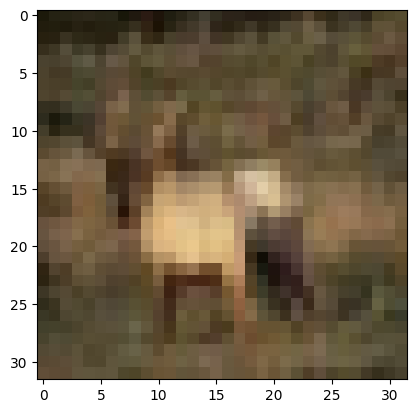

In [8]:
import matplotlib.pyplot as plt

plt.imshow(trainset.data[3])
plt.show()

In [9]:
class CIFAR10Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=(3,3), stride=1, padding=1)
        self.act1 = nn.ReLU()
        self.drop1 = nn.Dropout(0.3)

        self.conv2 = nn.Conv2d(32, 32, kernel_size=(3,3), stride=1, padding=1)
        self.act2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=(2, 2))

        self.flat = nn.Flatten()

        self.fc3 = nn.Linear(8192, 512)
        self.act3 = nn.ReLU()
        self.drop3 = nn.Dropout(0.5)

        self.fc4 = nn.Linear(512, 10)

    def forward(self, x):
        # input 3x32x32, output 32x32x32
        x = self.act1(self.conv1(x))
        x = self.drop1(x)
        # input 32x32x32, output 32x32x32
        x = self.act2(self.conv2(x))
        # input 32x32x32, output 32x16x16
        x = self.pool2(x)
        # input 32x16x16, output 8192
        x = self.flat(x)
        # input 8192, output 512
        x = self.act3(self.fc3(x))
        x = self.drop3(x)
        # input 512, output 10
        x = self.fc4(x)
        return x

model = CIFAR10Model()

In [10]:
X = torch.tensor([trainset.data[7]], dtype=torch.float32).permute(0,3,1,2)
model.eval()
with torch.no_grad():
    feature_maps = model.conv1(X)

<ipython-input-10-f3dd183cadd6>:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  X = torch.tensor([trainset.data[7]], dtype=torch.float32).permute(0,3,1,2)


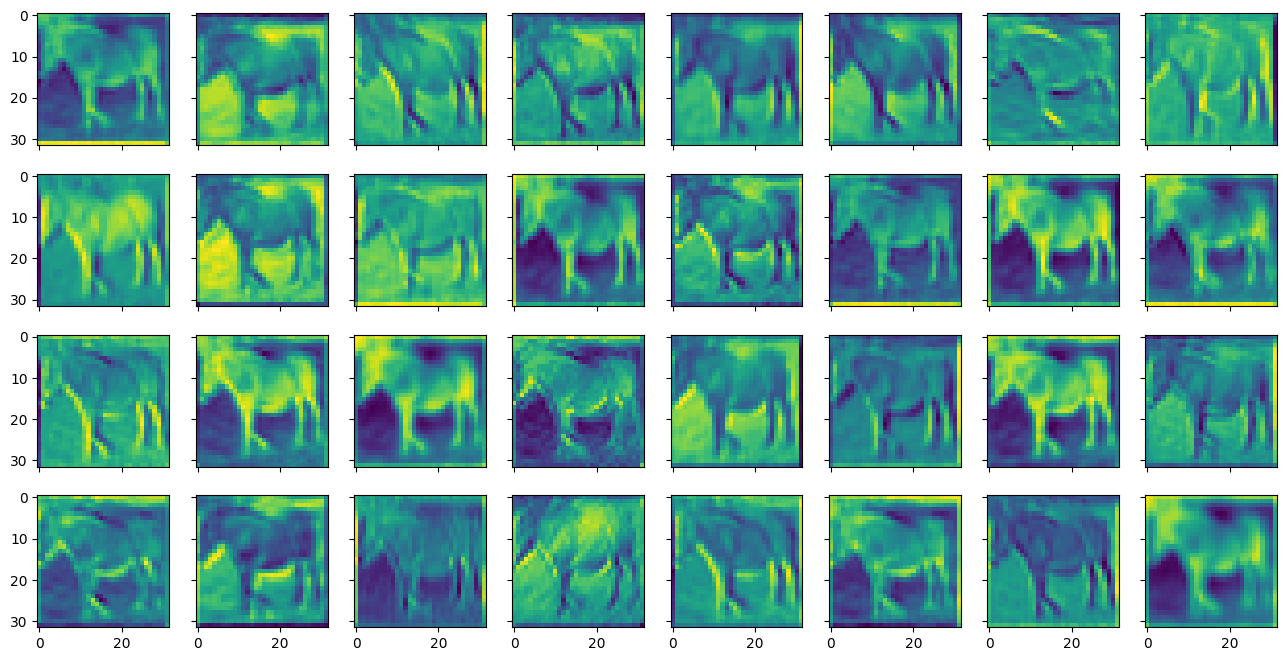

In [11]:
fig, ax = plt.subplots(4, 8, sharex=True, sharey=True, figsize=(16,8))
for i in range(0, 32):
    row, col = i//8, i%8
    ax[row][col].imshow(feature_maps[0][i])
plt.show()

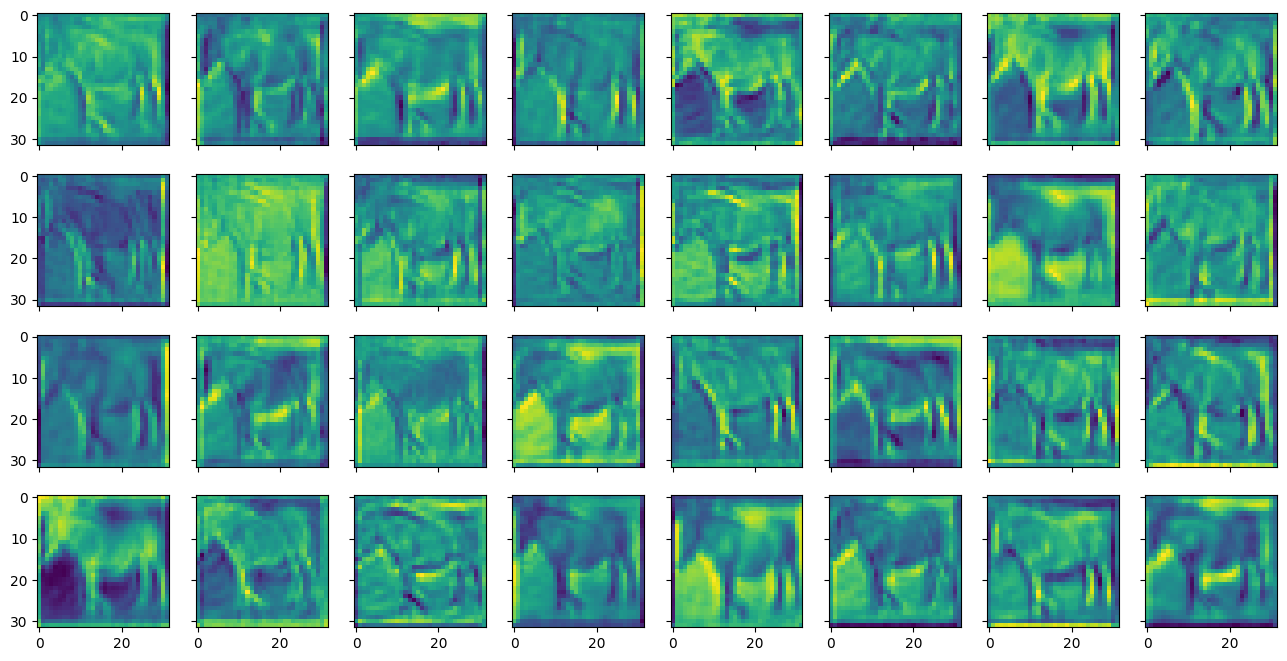

In [12]:
X = torch.tensor([trainset.data[7]], dtype=torch.float32).permute(0,3,1,2)

model.eval()
with torch.no_grad():
    feature_maps = model.act1(model.conv1(X))
    feature_maps = model.drop1(feature_maps)
    feature_maps = model.conv2(feature_maps)

fig, ax = plt.subplots(4, 8, sharex=True, sharey=True, figsize=(16,8))
for i in range(0, 32):
    row, col = i//8, i%8
    ax[row][col].imshow(feature_maps[0][i])
plt.show()

In [13]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

batch_size = 32
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)


loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

n_epochs = 20
for epoch in range(n_epochs):
    for inputs, labels in trainloader:
        # forward, backward, and then weight update
        y_pred = model(inputs)
        loss = loss_fn(y_pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    acc = 0
    count = 0
    for inputs, labels in testloader:
        y_pred = model(inputs)
        acc += (torch.argmax(y_pred, 1) == labels).float().sum()
        count += len(labels)
    acc /= count
    print("Epoch %d: model accuracy %.2f%%" % (epoch, acc*100))

torch.save(model.state_dict(), "cifar10model.pth")

Files already downloaded and verified
Files already downloaded and verified
Epoch 0: model accuracy 38.12%


KeyboardInterrupt: 

## CODE: Do this on GPU T4

Follow this example: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

# Real world example

https://github.com/pytorch/examples/blob/main/imagenet/main.py
